El codigo determinara si la calidad de un producto es mala, media o buena.

---


ENTRADAS: 


Precio:

    Caro
    Medio
    Barato

  Material:

    Bueno
    Medio
    Malo

SALIDA

  Calidad:

    Alta
    Media
    Baja

REGLAS:

 Si el precio es alto y el material es bueno, la calidad del producto es alta.

 si el precio es medio y el material es medio, la calidad del producto es media.

 si el precio es bajo y el material es malo, la calidad del producto es malo.

In [2]:
!pip install networkx==2.3
!pip install scikit-fuzzy


     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=858056a5e74678f696ba738d101c852232f159b0f830f3d0fa18288420e7229a
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c0c90e3feab1b1e298f32fec7ca877eb2abc74a2ddabd19c8698880123

In [86]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


precio = ctrl.Antecedent(np.arange(0, 11, 1), 'precio')
material = ctrl.Antecedent(np.arange(0, 11, 1), 'material')
calidad = ctrl.Consequent(np.arange(0, 11, 1), 'calidad')


material.automf(names=['malo', 'medio', 'bueno'])
precio.automf(names=['bajo', 'medio', 'alto'])

calidad['mala'] = fuzz.trimf(calidad.universe, [0, 0, 5])
calidad['media'] = fuzz.trimf(calidad.universe, [0, 5, 10])
calidad['alta'] = fuzz.trimf(calidad.universe, [5, 10, 10])

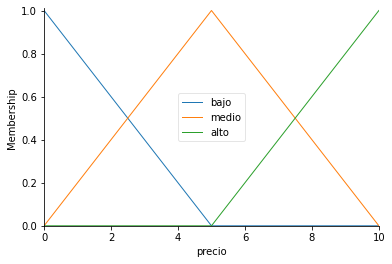

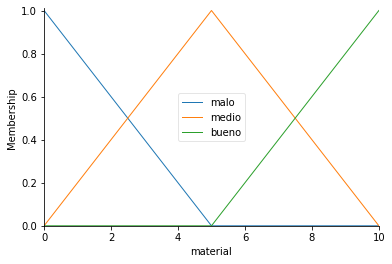

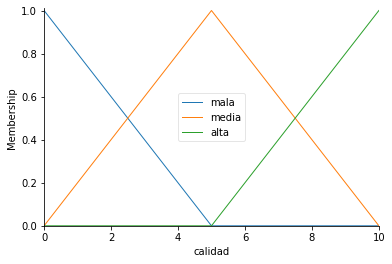

In [176]:
precio.view()
material.view()
calidad.view()

In [192]:
R1 = ctrl.Rule(precio['alto'] & material['bueno'], calidad['alta'])
R2 = ctrl.Rule(material['medio'], calidad['media'])
R3 = ctrl.Rule(precio['bajo'] | material['malo'], calidad['mala'])
R4 = ctrl.Rule(precio['medio'] & material['bueno'], calidad['alta'])

In [205]:
calidad_ctrl = ctrl.ControlSystem([R1,R2,R3,R4])
calidad_sim = ctrl.ControlSystemSimulation(calidad_ctrl)

calidad_sim.input['precio'] = 6.5
calidad_sim.input['material'] =9.4

calidad_sim.compute()

In [206]:
# ====== precio ========
print("=======precio======")
input = 6.5
for t in precio.terms: 
  mval = np.interp(input, precio.universe, precio[t].mf)
  print(t, mval)

# ====== material ========
print("\n=======material======")
input = 9.4
for t in material.terms: 
  mval = np.interp(input, material.universe, material[t].mf)
  print(t, mval)

=======precio======
bajo 0.0
medio 0.7
alto 0.30000000000000004

=======material======
malo 0.0
medio 0.11999999999999994
bueno 0.8800000000000001


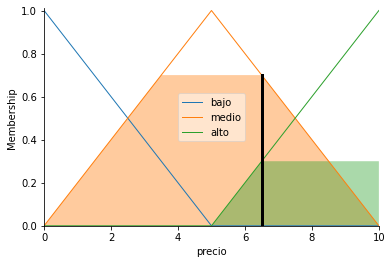

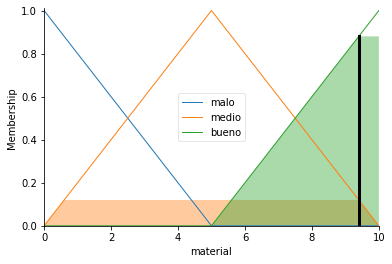

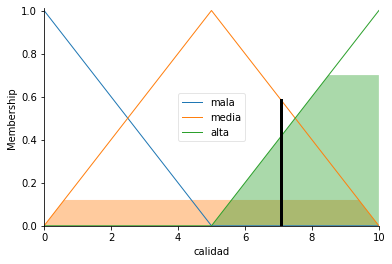

In [207]:
precio.view(sim=calidad_sim)
material.view(sim=calidad_sim)
calidad.view(sim=calidad_sim)

In [208]:

print("calidad :",calidad_sim.output['calidad'])


calidad : 7.074381970794527
